# **Graham Scan Implementation**

---
You will find error in some cases where same points are generated again as the points are randomely generated with python library . 
In this case you have run this code again for genrate unique points


Points are : [[12, 0], [7, 2], [3, 11], [20, 12], [18, 6], [10, 4], [6, 8], [4, 6], [7, 2], [11, 16], [7, 20], [2, 0], [4, 7], [20, 9], [5, 15], [5, 11], [19, 8], [17, 17], [16, 14], [2, 5]]


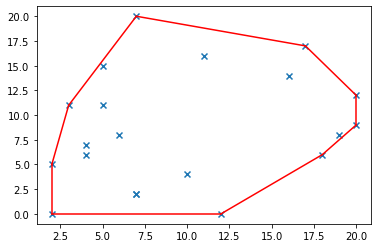

In [ ]:
import matplotlib.pyplot as plt
from random import randint as rd
from math import atan2,sqrt


def random_points(number_of_points , min=0 , max = 20):
    return [[rd(min,max),rd(min,max)] for i in range(number_of_points)]

def initial_point(points):
    start_point=None
    for i,(x,y) in enumerate(points):
        if start_point==None or y<points[start_point][1]:
            start_point=i
        if y==points[start_point][1] and x<points[start_point][0]:
            start_point=i
    return points[start_point]

def polar_angle(p1 , p0 = None ):
    p0 = p
    del_y = p1[1]-p0[1]
    del_x=p1[0]-p0[0]
    return atan2(del_y,del_x)

def distance(p1 , p0 = None ):
    p0 = p
    del_y = p1[1] - p0[1]
    del_x = p1[0] - p0[0]
    return sqrt(del_x**2 + del_y**2)
 
def determinant(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - (c[0] - a[0]) * (b[1] - a[1])


def angular_sort(a):
    if len(a)<=1:
        return a
    smaller,equal,larger=[],[],[]
    piv_ang=polar_angle(a[rd(0,len(a)-1)])
    for pt in a:
        pt_ang=polar_angle(pt)
        if pt_ang<piv_ang:
            smaller.append(pt)
        elif pt_ang==piv_ang:
            equal.append(pt)
        else:
            larger.append(pt)
    return angular_sort(smaller) \
            + sorted(equal,key=distance) \
            + angular_sort(larger)
def determinant(p1,p2,p3):
	return (p2[0]-p1[0])*(p3[1]-p1[1]) - (p2[1]-p1[1])*(p3[0]-p1[0])

def visualization(points , hull = None):
    x,y = zip(*points)
    plt.scatter(x,y,marker='x')
    if hull != None:
        for i in range(1,len(hull)+1):
            if i==len(hull):
                i=0
            p0=hull[i-1]
            p1=hull[i]
            plt.plot((p0[0],p1[0]),(p0[1],p1[1]),'r')
    plt.show()



def GrahamScan(points):
    global p
    p = initial_point(points)
    sorted_points = angular_sort(points)
    del sorted_points[sorted_points.index(p)]
    hull = [p, sorted_points[0]]

    for i in sorted_points[1:]:
        while len(hull) > 1 and determinant(hull[-2],hull[-1],i) <= 0:
            del hull[-1]
        hull.append(i)
    return hull

points = random_points(20)
print(f"Points are : {points}")
hull = GrahamScan(points)
visualization(points,hull)

In [ ]:
def collinear(p1,p2,p3):
    area = p1[0] * (p2[1] - p3[1]) + p2[0] * (p3[1] - p1[1]) + p3[0] * (p1[1] - p2[1])
    return True if area == 0 else False
def same(a,b,c):
    if a == b or b == c or c == a :
        return True

def equation(p1 , p2):
    if p2[0] - p1[0] == 0 :
        return f'X = {p1[0]}'
    m = (p2[1] - p1[1])/(p2[0] - p1[0])
    c = p1[1] - (p1[0] * m)
    if m == 0 :
        return f" Y = {c}"
    return f'Y = {round(m,2)}X + {round(c,2)}'


def lines(points):
    global p
    points_with_equation = {}
    count = 0
    for x in points:
        p = x
        sorted_points = angular_sort(points)
        del sorted_points[sorted_points.index(p)]
        tracker = sorted_points[0]
        for i in sorted_points[1:]:
            if collinear(p,tracker,i) and not same(p,tracker,i):
                points_with_equation[equation(p, i)] = [p,tracker,i]
                del sorted_points[sorted_points.index(tracker)]
                del sorted_points[sorted_points.index(i)]
            else :
                tracker = i

    return points_with_equation

if __name__ == '__main__':
    points = random_points(20)
    print(f'Points tested : {points}\n')
    result = lines(points)
    line = len(result)
    print(f'There are {line} collinear in Tested points\n')
    for i,equation in enumerate(result):
        print(f'Set-{i+1}==> {result[equation]} are collinear and their equation is : {equation}\n')



Points tested : [[20, 18], [14, 18], [9, 10], [10, 20], [3, 12], [9, 5], [8, 0], [14, 1], [0, 20], [7, 8], [2, 19], [13, 14], [1, 5], [17, 16], [13, 4], [4, 19], [1, 0], [20, 7], [2, 15], [6, 19]]

There are 6 collinear in Tested points

Set-1==> [[8, 0], [9, 10], [10, 20]] are collinear and their equation is : Y = 10.0X + -80.0

Set-2==> [[14, 1], [7, 8], [3, 12]] are collinear and their equation is : Y = -1.0X + 15.0

Set-3==> [[0, 20], [2, 15], [8, 0]] are collinear and their equation is : Y = -2.5X + 20.0

Set-4==> [[4, 19], [9, 10], [14, 1]] are collinear and their equation is : Y = -1.8X + 26.2

Set-5==> [[13, 14], [9, 10], [7, 8]] are collinear and their equation is : Y = 1.0X + 1.0

Set-6==> [[6, 19], [4, 19], [2, 19]] are collinear and their equation is :  Y = 19.0

